In [17]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
#Load the Cleaned Dataset

data = pd.read_csv(r"D:\Kifya_training\Week 0\data\all_cleaned.csv")
data.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
0,2021-08-09 00:01:00,0.0,0.0,0.0,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2
1,2021-08-09 00:02:00,0.0,0.0,0.0,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2
2,2021-08-09 00:03:00,0.0,0.0,0.0,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2
3,2021-08-09 00:04:00,0.0,0.0,0.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3
4,2021-08-09 00:05:00,0.0,0.0,0.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3


In [19]:
# Summary Statistics
data.describe()


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
count,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06
mean,2.260281e+02,1.450747e+02,1.165704e+02,2.231257e+02,2.155223e+02,2.741696e+01,6.298333e+01,1.878440e+00,2.576763e+00,4.649840e-01,1.494072e+02,8.771398e+00,9.899963e+02,8.079655e-04,2.697615e-03,3.339823e+01,3.286939e+01
std,3.169064e+02,2.452988e+02,1.570024e+02,3.154732e+02,3.049439e+02,5.131024e+00,2.854366e+01,1.536357e+00,1.961275e+00,2.904002e-01,1.039399e+02,6.790689e+00,1.046797e+01,2.841326e-02,3.803610e-02,1.290953e+01,1.238889e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.100000e+01,2.100000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.680000e+02,0.000000e+00,0.000000e+00,9.000000e+00,8.100000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.370000e+01,3.860000e+01,6.000000e-01,1.100000e+00,4.000000e-01,5.330000e+01,2.900000e+00,9.770000e+02,0.000000e+00,0.000000e+00,2.370000e+01,2.370000e+01
50%,1.200000e+00,0.000000e+00,1.400000e+00,4.100000e+00,4.000000e+00,2.680000e+01,6.900000e+01,1.800000e+00,2.400000e+00,5.000000e-01,1.803000e+02,9.000000e+00,9.940000e+02,0.000000e+00,0.000000e+00,2.830000e+01,2.800000e+01
75%,4.244000e+02,2.270000e+02,2.190000e+02,4.111000e+02,3.973000e+02,3.100000e+01,8.860000e+01,2.800000e+00,3.600000e+00,6.000000e-01,2.342000e+02,1.290000e+01,9.990000e+02,0.000000e+00,0.000000e+00,4.260000e+01,4.190000e+01
max,1.499000e+03,1.004500e+03,8.920000e+02,1.507000e+03,1.473000e+03,4.380000e+01,1.000000e+02,1.950000e+01,2.660000e+01,4.700000e+00,3.600000e+02,9.940000e+01,1.006000e+03,1.000000e+00,2.500000e+00,8.100000e+01,9.460000e+01


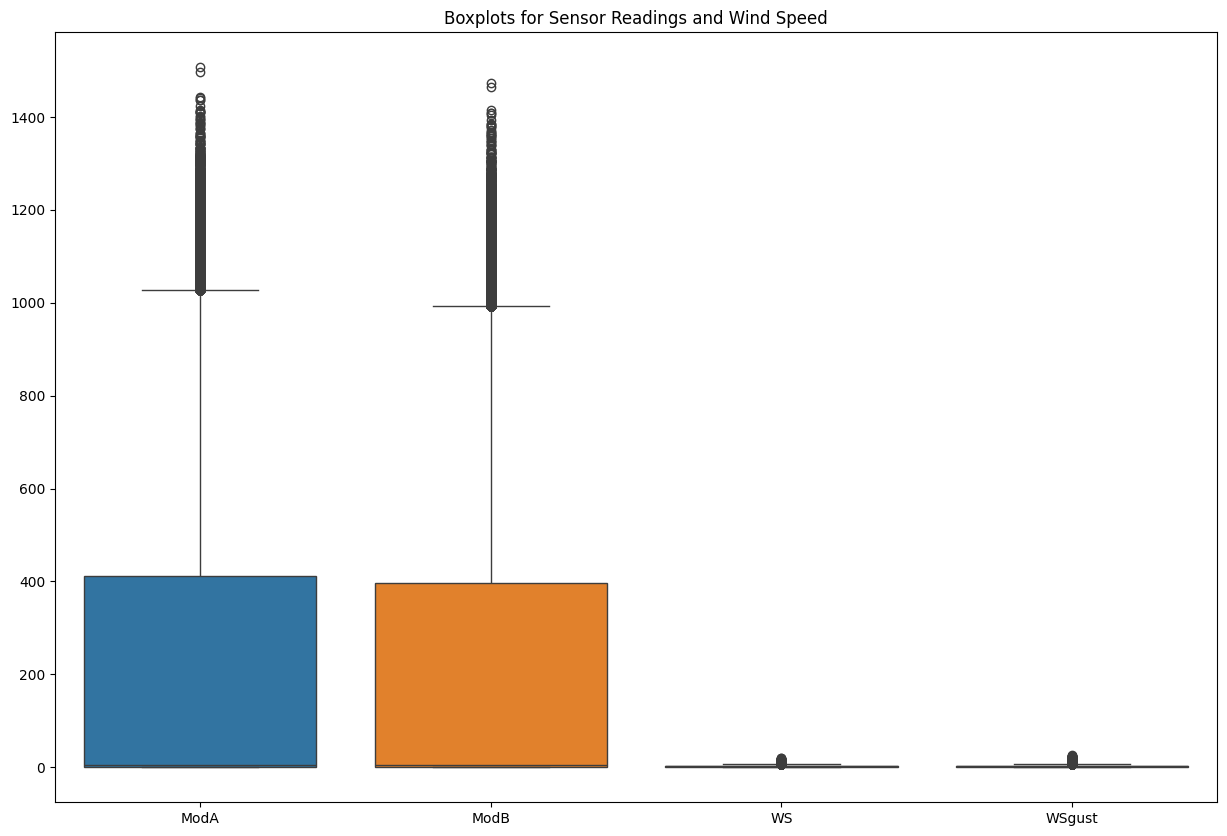

(Timestamp        0
 GHI              0
 DNI              0
 DHI              0
 ModA             0
 ModB             0
 Tamb             0
 RH               0
 WS               0
 WSgust           0
 WSstdev          0
 WD               0
 WDstdev          0
 BP               0
 Cleaning         0
 Precipitation    0
 TModA            0
 TModB            0
 dtype: int64,
 GHI    0
 DNI    0
 DHI    0
 dtype: int64)

In [20]:
# Check for missing values
missing_values = data.isnull().sum()

# Check for incorrect values or negative values in GHI, DNI, and DHI
incorrect_values = data[['GHI', 'DNI', 'DHI']].lt(0).sum()

# Check for outliers in ModA, ModB, WS, and WSgust using boxplots
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

# Plot boxplots for ModA, ModB, WS, and WSgust
sns.boxplot(data=data[['ModA', 'ModB', 'WS', 'WSgust']])
plt.title('Boxplots for Sensor Readings and Wind Speed')
plt.show()

# Return missing values and incorrect values summary
missing_values, incorrect_values


In [21]:
# Convert 'Timestamp' column to datetime format
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Set 'Timestamp' as the index
data.set_index('Timestamp', inplace=True)

# Extract date features (month, day, hour)
data['month'] = data.index.month
data['day'] = data.index.day
data['hour'] = data.index.hour

# Verify the changes
print(data.head())


                     GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
Timestamp                                                                 
2021-08-09 00:01:00  0.0  0.0  0.0   0.0   0.0  26.2  93.4  0.0     0.4   
2021-08-09 00:02:00  0.0  0.0  0.0   0.0   0.0  26.2  93.6  0.0     0.0   
2021-08-09 00:03:00  0.0  0.0  0.0   0.0   0.0  26.2  93.7  0.3     1.1   
2021-08-09 00:04:00  0.0  0.0  0.0   0.0   0.0  26.2  93.3  0.2     0.7   
2021-08-09 00:05:00  0.0  0.0  0.0   0.0   0.0  26.2  93.3  0.1     0.7   

                     WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  \
Timestamp                                                                    
2021-08-09 00:01:00      0.1  122.1      0.0  998         0            0.0   
2021-08-09 00:02:00      0.0    0.0      0.0  998         0            0.0   
2021-08-09 00:03:00      0.5  124.6      1.5  997         0            0.0   
2021-08-09 00:04:00      0.4  120.3      1.3  997         0            0.0   
2021-0

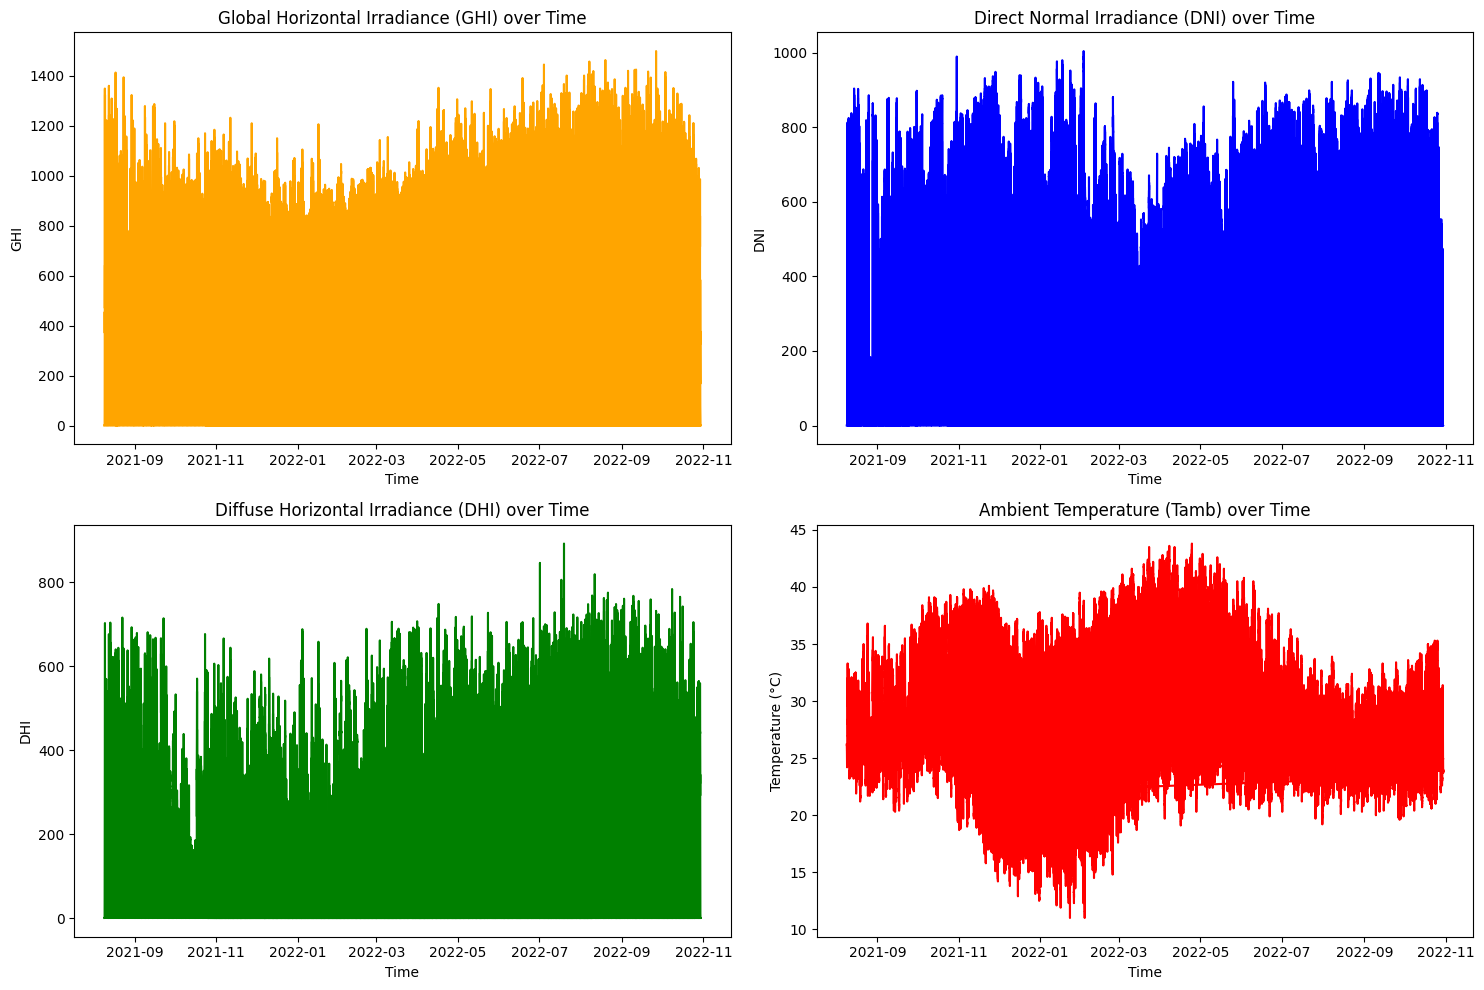

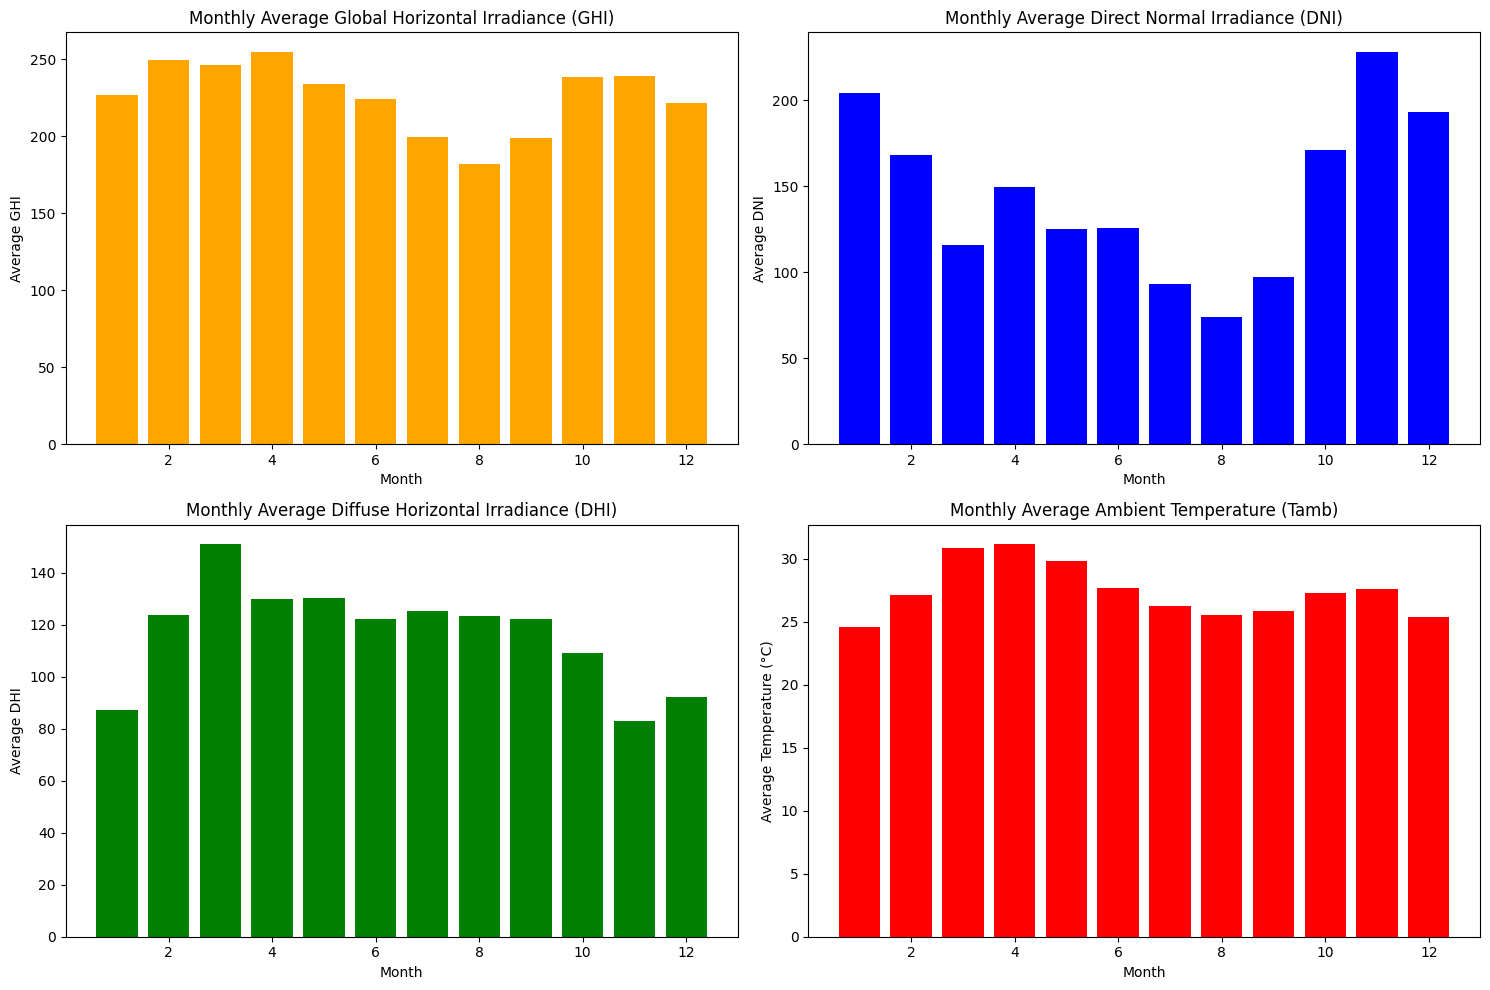

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot line charts for GHI, DNI, DHI, and Tamb over time

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# GHI over time
axs[0, 0].plot(data.index, data['GHI'], color='orange')
axs[0, 0].set_title('Global Horizontal Irradiance (GHI) over Time')
axs[0, 0].set_xlabel('Time')
axs[0, 0].set_ylabel('GHI')

# DNI over time
axs[0, 1].plot(data.index, data['DNI'], color='blue')
axs[0, 1].set_title('Direct Normal Irradiance (DNI) over Time')
axs[0, 1].set_xlabel('Time')
axs[0, 1].set_ylabel('DNI')

# DHI over time
axs[1, 0].plot(data.index, data['DHI'], color='green')
axs[1, 0].set_title('Diffuse Horizontal Irradiance (DHI) over Time')
axs[1, 0].set_xlabel('Time')
axs[1, 0].set_ylabel('DHI')

# Tamb (Temperature) over time
axs[1, 1].plot(data.index, data['Tamb'], color='red')
axs[1, 1].set_title('Ambient Temperature (Tamb) over Time')
axs[1, 1].set_xlabel('Time')
axs[1, 1].set_ylabel('Temperature (°C)')

plt.tight_layout()
plt.show()

# Optional: Plot Monthly Patterns for GHI, DNI, DHI, and Tamb
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# GHI by month (Monthly average)
monthly_avg_GHI = data.groupby('month')['GHI'].mean()
axs[0, 0].bar(monthly_avg_GHI.index, monthly_avg_GHI.values, color='orange')
axs[0, 0].set_title('Monthly Average Global Horizontal Irradiance (GHI)')
axs[0, 0].set_xlabel('Month')
axs[0, 0].set_ylabel('Average GHI')

# DNI by month (Monthly average)
monthly_avg_DNI = data.groupby('month')['DNI'].mean()
axs[0, 1].bar(monthly_avg_DNI.index, monthly_avg_DNI.values, color='blue')
axs[0, 1].set_title('Monthly Average Direct Normal Irradiance (DNI)')
axs[0, 1].set_xlabel('Month')
axs[0, 1].set_ylabel('Average DNI')

# DHI by month (Monthly average)
monthly_avg_DHI = data.groupby('month')['DHI'].mean()
axs[1, 0].bar(monthly_avg_DHI.index, monthly_avg_DHI.values, color='green')
axs[1, 0].set_title('Monthly Average Diffuse Horizontal Irradiance (DHI)')
axs[1, 0].set_xlabel('Month')
axs[1, 0].set_ylabel('Average DHI')

# Tamb by month (Monthly average)
monthly_avg_Tamb = data.groupby('month')['Tamb'].mean()
axs[1, 1].bar(monthly_avg_Tamb.index, monthly_avg_Tamb.values, color='red')
axs[1, 1].set_title('Monthly Average Ambient Temperature (Tamb)')
axs[1, 1].set_xlabel('Month')
axs[1, 1].set_ylabel('Average Temperature (°C)')

plt.tight_layout()
plt.show()
